In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install SimpleITK

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 8.1 MB/s eta 0:00:00


In [ ]:
import os
import sys
import pandas as pd
import numpy as np
import cv2 as cv

import inspect
path = "/content/drive/Shareddrives/IA DL_project/ML IA/IMAGE_PROCESSING_PIPELINE"

if path not in sys.path:
  sys.path.append(path)

import luna_module
from luna_module import *

# List all function names in the luna_module
function_names = [name for name, obj in inspect.getmembers(luna_module) if inspect.isfunction(obj)]
print(function_names)

['annotations_by_uid', 'binarize_lung', 'binarize_lung_3d', 'binary_closing', 'binary_dilation', 'binary_erosion', 'binary_fill_holes', 'binary_opening', 'center_of_mass', 'clear_border', 'convert_annotation_df', 'convert_annotation_df_with_uid', 'create_3d_mask', 'create_annotations_mask', 'create_annotations_mask_by_uid', 'create_patch', 'debugger', 'draw_ellipsoid', 'find_by_uid', 'find_neighborhood_indices', 'find_neighborhood_indices_more_precise', 'get_slice_candidates', 'get_slice_candidates_old', 'get_slices', 'get_uids', 'img_by_uid', 'masked_annotations_by_uid', 'masked_annotations_with_info_by_uid', 'meta_by_uid', 'norm2float', 'norm2uint16', 'norm2uint8', 'normalize_intensity', 'plot_slices', 'process_slice_candidates', 'process_slices', 'remove_non_central_objects', 'sensitivity_score', 'sensitivity_score_more_precise', 'show_3_images', 'subset_by_uid', 'unwanted_object_filter']


# DATASETS

## FOR TRAINING

In [ ]:
LUNA_PATH = os.path.join(os.getcwd(), "drive", "Shareddrives", "IA DL_project", "ML IA", "LUNA16")

SUBSETS_PATH = os.path.join(LUNA_PATH, "candidates", "solidity_on_z") # path for subsets folder


In [ ]:
LUNA_PATH = os.path.join(os.getcwd(), "drive", "Shareddrives", "IA DL_project", "ML IA", "LUNA16")

ground_truth_annotations0 = pd.read_csv(os.path.join(LUNA_PATH, f"subset0_annotations_expanded.csv"), index_col="Unnamed: 0")
ground_truth_annotations1 = pd.read_csv(os.path.join(LUNA_PATH, f"subset1_annotations_expanded.csv"), index_col="Unnamed: 0")
ground_truth_annotations8 = pd.read_csv(os.path.join(LUNA_PATH, f"subset8_annotations_expanded.csv"), index_col="Unnamed: 0")

print(ground_truth_annotations0)
print(ground_truth_annotations1)
print(ground_truth_annotations8)

                                              seriesuid      coordX  \
23    1.3.6.1.4.1.14519.5.2.1.6279.6001.108197895896... -100.567944   
25    1.3.6.1.4.1.14519.5.2.1.6279.6001.109002525524...   46.188539   
26    1.3.6.1.4.1.14519.5.2.1.6279.6001.109002525524...   36.392044   
28    1.3.6.1.4.1.14519.5.2.1.6279.6001.111172165674...  136.434059   
86    1.3.6.1.4.1.14519.5.2.1.6279.6001.124154461048...  145.967465   
...                                                 ...         ...   
1125  1.3.6.1.4.1.14519.5.2.1.6279.6001.868211851413...  -22.951826   
1137  1.3.6.1.4.1.14519.5.2.1.6279.6001.898642529028...  -42.200674   
1138  1.3.6.1.4.1.14519.5.2.1.6279.6001.898642529028...   74.399625   
1141  1.3.6.1.4.1.14519.5.2.1.6279.6001.905371958588...  109.116637   
1180  1.3.6.1.4.1.14519.5.2.1.6279.6001.979083010707... -104.441975   

          coordY      coordZ  diameter_mm  \
23     67.260517 -231.816619     6.440879   
25     48.402806 -108.578632    13.596471   
26     76.77

In [ ]:
candidates0 = pd.read_csv("/content/drive/Shareddrives/IA DL_project/ML IA/LUNA16/candidates/solidity_on_z/subset0/subset0_candidates.csv", index_col="Unnamed: 0")
candidates1 = pd.read_csv("/content/drive/Shareddrives/IA DL_project/ML IA/LUNA16/candidates/solidity_on_z/subset1/subset1_candidates.csv", index_col="Unnamed: 0")

custom_features0 =  pd.read_csv("/content/drive/Shareddrives/IA DL_project/ML IA/LUNA16/feature_extractions/pretrained_gabors/subset0/custom_features.csv", index_col="Unnamed: 0")
custom_features1 =  pd.read_csv("/content/drive/Shareddrives/IA DL_project/ML IA/LUNA16/feature_extractions/pretrained_gabors/subset1/custom_features.csv", index_col="Unnamed: 0")

#hog_features0 =  pd.read_csv("/content/drive/Shareddrives/IA DL_project/ML IA/LUNA16/feature_extractions/pretrained_gabors/subset0/hog_features.csv", index_col="Unnamed: 0")
#hog_features1 =  pd.read_csv("/content/drive/Shareddrives/IA DL_project/ML IA/LUNA16/feature_extractions/pretrained_gabors/subset1/hog_features.csv", index_col="Unnamed: 0")

In [ ]:
print(len(candidates0))
print(len(custom_features0))
print(len(candidates0)-len(custom_features0))
print("-----------")
print(len(candidates1))
print(len(custom_features1))
print(len(candidates1)-len(custom_features1))


77509
77509
0
-----------
64355
64355
0


In [ ]:
print(candidates1)
print(candidates1[candidates1["Class"]==1])

                                               seriesuid    x    y    z  Class
0      1.3.6.1.4.1.14519.5.2.1.6279.6001.104562737760...  190  374   35    0.0
1      1.3.6.1.4.1.14519.5.2.1.6279.6001.104562737760...  167  382   37    0.0
2      1.3.6.1.4.1.14519.5.2.1.6279.6001.104562737760...  177  382   36    0.0
3      1.3.6.1.4.1.14519.5.2.1.6279.6001.104562737760...  184  382   35    0.0
4      1.3.6.1.4.1.14519.5.2.1.6279.6001.104562737760...  189  364   36    0.0
...                                                  ...  ...  ...  ...    ...
64350  1.3.6.1.4.1.14519.5.2.1.6279.6001.970264865033...  302  254  375    0.0
64351  1.3.6.1.4.1.14519.5.2.1.6279.6001.970264865033...  186  273  378    0.0
64352  1.3.6.1.4.1.14519.5.2.1.6279.6001.970264865033...  271  265  381    0.0
64353  1.3.6.1.4.1.14519.5.2.1.6279.6001.970264865033...  269  265  384    0.0
64354  1.3.6.1.4.1.14519.5.2.1.6279.6001.970264865033...  249  259  388    0.0

[64355 rows x 5 columns]
                          

In [ ]:
candidates0 = candidates0.sort_index()
candidates1 = candidates1.sort_index()

custom_features0 = custom_features0.sort_index()
custom_features1 = custom_features1.sort_index()

# hog_features0 = hog_features0.sort_index()
# hog_features1 = hog_features1.sort_index()

In [ ]:
# hog_features0["Class"] = custom_features0["Class"]
# hog_features1["Class"] = custom_features1["Class"]


custom_features0[["x", "y", "z"]] = candidates0[["x", "y", "z"]]
custom_features1[["x", "y", "z"]] = candidates1[["x", "y", "z"]]


custom_features0_positives = custom_features0[custom_features0["Class"]==1]
custom_features0_negatives = custom_features0.drop(custom_features0[custom_features0["Class"]==1].index)

custom_features1_positives = custom_features1[custom_features1["Class"]==1]
custom_features1_negatives = custom_features1.drop(custom_features1[custom_features1["Class"]==1].index)

# hog_features0_positives = hog_features0[hog_features0["Class"]==1]
# hog_features0_negatives = hog_features0.drop(hog_features0[hog_features0["Class"]==1].index)

# hog_features1_positives = hog_features1[hog_features1["Class"]==1]
# hog_features1_negatives = hog_features1.drop(hog_features1[hog_features1["Class"]==1].index)

# print(custom_features0_negatives)

print(custom_features1_positives)
# print(custom_features1_negatives)

       z_distance_from_boundary  z_distance_from_boundary_percent  area  \
419                         100                          0.357143     0   
420                         101                          0.360714     0   
2809                        141                          0.429878     0   
2820                        141                          0.429878     0   
3019                        133                          0.405488     0   
...                         ...                               ...   ...   
63481                       149                          0.450151     0   
63482                       150                          0.453172     0   
63500                       152                          0.459215     0   
63504                       155                          0.468278     0   
63910                       202                          0.466513     0   

       perimeter  compactness  eccentricity  major_axis_length  \
419          0.0          0.0    

In [ ]:
custom_features_all = pd.concat([custom_features0,custom_features1,], ignore_index=True)
# hog_features_all = pd.concat([hog_features0,hog_features1,], ignore_index=True)

custom_features_all_positives = pd.concat([custom_features0_positives,custom_features1_positives,], ignore_index=True)
custom_features_all_negatives = pd.concat([custom_features0_negatives,custom_features1_negatives,], ignore_index=True)

# hog_features_all_positives = pd.concat([hog_features0_positives,hog_features1_positives,], ignore_index=True)
# hog_features_all_negatives = pd.concat([hog_features0_negatives,hog_features1_negatives,], ignore_index=True)

In [ ]:
stripped_ground_truth_annotations0 = convert_annotation_df_with_uid(ground_truth_annotations0)
stripped_ground_truth_annotations1 = convert_annotation_df_with_uid(ground_truth_annotations1)

print(ground_truth_annotations0)
print(stripped_ground_truth_annotations0)

                                              seriesuid      coordX  \
23    1.3.6.1.4.1.14519.5.2.1.6279.6001.108197895896... -100.567944   
25    1.3.6.1.4.1.14519.5.2.1.6279.6001.109002525524...   46.188539   
26    1.3.6.1.4.1.14519.5.2.1.6279.6001.109002525524...   36.392044   
28    1.3.6.1.4.1.14519.5.2.1.6279.6001.111172165674...  136.434059   
86    1.3.6.1.4.1.14519.5.2.1.6279.6001.124154461048...  145.967465   
...                                                 ...         ...   
1125  1.3.6.1.4.1.14519.5.2.1.6279.6001.868211851413...  -22.951826   
1137  1.3.6.1.4.1.14519.5.2.1.6279.6001.898642529028...  -42.200674   
1138  1.3.6.1.4.1.14519.5.2.1.6279.6001.898642529028...   74.399625   
1141  1.3.6.1.4.1.14519.5.2.1.6279.6001.905371958588...  109.116637   
1180  1.3.6.1.4.1.14519.5.2.1.6279.6001.979083010707... -104.441975   

          coordY      coordZ  diameter_mm  \
23     67.260517 -231.816619     6.440879   
25     48.402806 -108.578632    13.596471   
26     76.77

### SECURITY CHECK FOR SENSITIVITY

In [ ]:
total_gt = 0
total_hits = 0
total_hits_count = 0

uids0 = set(stripped_ground_truth_annotations0["seriesuid"])
for i, uid in enumerate(uids0):

  uid = uid.replace(".csv", "")
  print(f"\n[START] - {uid} - case {i+1} out of {len(uids0)}")

  uid_candidates_df = candidates0[candidates0["seriesuid"] == uid]
  uid_annotations_df = annotations_by_uid(uid, stripped_ground_truth_annotations0)

  hit_i, hit_i_dict = find_neighborhood_indices_more_precise(uid_candidates_df, uid_annotations_df)

  # Counting nodules
  total_gt += len(hit_i_dict.keys())
  # Counting candidates that are in the vicinity of the nodule
  for i in hit_i_dict.values():
    total_hits_count += len(i)
    if len(i):
      total_hits += 1

  print(f"\n[CANDIDATES] - {uid}")
  print(uid_candidates_df.loc[hit_i].drop(columns=["seriesuid"]))
  print(f"\n[GROUND TRUTH] - {uid}")
  print(uid_annotations_df.drop(columns=["seriesuid"]))
  print(f"\n[HITS] - {uid}")
  print(hit_i_dict)


  print(f"\n[DONE] - {uid}")
  print("--------------------------------------")

print("--------------------------------------")
total_gt1 = 0
total_hits1 = 0
total_hits_count1 = 0

uids1 = set(stripped_ground_truth_annotations1["seriesuid"])
for i, uid in enumerate(uids1):

  uid = uid.replace(".csv", "")
  print(f"\n[START] - {uid} - case {i+1} out of {len(uids1)}")

  uid_candidates_df = candidates1[candidates1["seriesuid"] == uid]
  uid_annotations_df = annotations_by_uid(uid, stripped_ground_truth_annotations1)

  hit_i, hit_i_dict = find_neighborhood_indices_more_precise(uid_candidates_df, uid_annotations_df)

  # Counting nodules
  total_gt1 += len(hit_i_dict.keys())
  # Counting candidates that are in the vicinity of the nodule
  for i in hit_i_dict.values():
    total_hits_count1 += len(i)
    if len(i):
      total_hits1 += 1

  print(f"\n[CANDIDATES] - {uid}")
  print(uid_candidates_df.loc[hit_i].drop(columns=["seriesuid"]))
  print(f"\n[GROUND TRUTH] - {uid}")
  print(uid_annotations_df.drop(columns=["seriesuid"]))
  print(f"\n[HITS] - {uid}")
  print(hit_i_dict)


  print(f"\n[DONE] - {uid}")
  print("--------------------------------------")


print(f"\n[TOTAL HITS COUNT0]: {total_hits_count}")
print(f"[SENS0]: {total_hits/total_gt}")


print(f"\n[TOTAL HITS COUNT1]: {total_hits_count1}")
print(f"[SENS1]: {total_hits1/total_gt1}")


[START] - 1.3.6.1.4.1.14519.5.2.1.6279.6001.404364125369979066736354549484 - case 1 out of 67

[CANDIDATES] - 1.3.6.1.4.1.14519.5.2.1.6279.6001.404364125369979066736354549484
         x    y   z  Class
51036  437  346  69    1.0

[GROUND TRUTH] - 1.3.6.1.4.1.14519.5.2.1.6279.6001.404364125369979066736354549484
       x    y   z  diam_x  diam_y  diam_z
970  437  346  69       9       9       3

[HITS] - 1.3.6.1.4.1.14519.5.2.1.6279.6001.404364125369979066736354549484
{970: [51036]}

[DONE] - 1.3.6.1.4.1.14519.5.2.1.6279.6001.404364125369979066736354549484
--------------------------------------

[START] - 1.3.6.1.4.1.14519.5.2.1.6279.6001.534006575256943390479252771547 - case 2 out of 67

[CANDIDATES] - 1.3.6.1.4.1.14519.5.2.1.6279.6001.534006575256943390479252771547
         x    y    z  Class
59501  456  264  201    1.0
60157  157  362  378    1.0
60168  158  358  382    1.0
60245  362  241  422    1.0
60247  350  233  418    1.0
60262  362  229  421    1.0
60272  366  248  426    1.0

## FOR VALIDATION

In [ ]:
candidates8 = pd.read_csv("/content/drive/Shareddrives/IA DL_project/ML IA/LUNA16/candidates/solidity_on_z/subset8/subset8_candidates.csv", index_col="Unnamed: 0")

custom_features8 =  pd.read_csv("/content/drive/Shareddrives/IA DL_project/ML IA/LUNA16/feature_extractions/pretrained_gabors/subset8/custom_features.csv", index_col="Unnamed: 0")

# hog_features8 =  pd.read_csv("/content/drive/Shareddrives/IA DL_project/ML IA/LUNA16/feature_extractions/pretrained_gabors/subset8/hog_features.csv", index_col="Unnamed: 0")

In [ ]:
stripped_ground_truth_annotations8 = convert_annotation_df_with_uid(ground_truth_annotations8)

In [ ]:
candidates8 = candidates8.sort_index()

custom_features8 = custom_features8.sort_index()

# hog_features8 = hog_features8.sort_index()

In [ ]:
candidates8

,seriesuid,x,y,z,Class
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,42,303,26,0.0
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,471,291,27,0.0
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,475,283,28,0.0
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,216,312,28,0.0
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,476,279,29,0.0
...,...,...,...,...,...
61117,1.3.6.1.4.1.14519.5.2.1.6279.6001.997611074084...,284,249,258,0.0
61118,1.3.6.1.4.1.14519.5.2.1.6279.6001.997611074084...,289,250,259,0.0
61119,1.3.6.1.4.1.14519.5.2.1.6279.6001.997611074084...,293,277,262,0.0
61120,1.3.6.1.4.1.14519.5.2.1.6279.6001.997611074084...,297,263,263,0.0


In [ ]:
# hog_features8["Class"] = custom_features8["Class"]

custom_features8[["x", "y", "z"]] = candidates8[["x", "y", "z"]]

custom_features8_positives = custom_features8[custom_features8["Class"]==1]
custom_features8_negatives = custom_features8.drop(custom_features8[custom_features8["Class"]==1].index)

print(custom_features8_positives)
# hog_features8_positives = hog_features8[hog_features8["Class"]==1]
# hog_features8_negatives = hog_features8.drop(hog_features8[hog_features8["Class"]==1].index)

       z_distance_from_boundary  z_distance_from_boundary_percent  area  \
249                          78                          0.402062     0   
1038                         42                          0.308824     0   
1387                         54                          0.397059     0   
2227                        150                          0.437318     5   
2353                        138                          0.402332     8   
...                         ...                               ...   ...   
60454                       135                          0.473684     0   
60457                       137                          0.480702     0   
60458                       136                          0.477193     0   
60491                       139                          0.487719     0   
60495                       139                          0.487719     0   

       perimeter  compactness  eccentricity  major_axis_length  \
249     0.000000     0.000000    

In [ ]:
total_gt8 = 0
total_hits8 = 0
total_hits_count8 = 0

uids1 = set(stripped_ground_truth_annotations8["seriesuid"])
for i, uid in enumerate(uids1):

  uid = uid.replace(".csv", "")
  print(f"\n[START] - {uid} - case {i+1} out of {len(uids1)}")

  uid_candidates_df = candidates8[candidates8["seriesuid"] == uid]
  uid_annotations_df = annotations_by_uid(uid, stripped_ground_truth_annotations8)

  hit_i, hit_i_dict = find_neighborhood_indices_more_precise(uid_candidates_df, uid_annotations_df)

  # Counting nodules
  total_gt8 += len(hit_i_dict.keys())
  # Counting candidates that are in the vicinity of the nodule
  for i in hit_i_dict.values():
    total_hits_count8 += len(i)
    if len(i):
      total_hits8 += 1

  print(f"\n[CANDIDATES] - {uid}")
  print(uid_candidates_df.loc[hit_i].drop(columns=["seriesuid"]))
  print(f"\n[GROUND TRUTH] - {uid}")
  print(uid_annotations_df.drop(columns=["seriesuid"]))
  print(f"\n[HITS] - {uid}")
  print(hit_i_dict)


  print(f"\n[DONE] - {uid}")
  print("--------------------------------------")




print(f"\n[TOTAL HITS COUNT8]: {total_hits_count8}")
print(f"[SENS8]: {total_hits8/total_gt8}")


[START] - 1.3.6.1.4.1.14519.5.2.1.6279.6001.486999111981013268988489262668 - case 1 out of 60

[CANDIDATES] - 1.3.6.1.4.1.14519.5.2.1.6279.6001.486999111981013268988489262668
         x    y   z  Class
51394  382  371  81    1.0

[GROUND TRUTH] - 1.3.6.1.4.1.14519.5.2.1.6279.6001.486999111981013268988489262668
        x    y   z  diam_x  diam_y  diam_z
1001  382  371  80      10      10       3

[HITS] - 1.3.6.1.4.1.14519.5.2.1.6279.6001.486999111981013268988489262668
{1001: [51394]}

[DONE] - 1.3.6.1.4.1.14519.5.2.1.6279.6001.486999111981013268988489262668
--------------------------------------

[START] - 1.3.6.1.4.1.14519.5.2.1.6279.6001.149041668385192796520281592139 - case 2 out of 60

[CANDIDATES] - 1.3.6.1.4.1.14519.5.2.1.6279.6001.149041668385192796520281592139
        x    y   z  Class
4327  363  355  23    1.0
4328  372  359  23    1.0
4330  352  358  25    1.0
4332  366  356  26    1.0
4333  352  368  26    1.0
4335  364  372  26    1.0
4336  360  373  28    1.0
4339  361  3

# EDA

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_distributions_compare_frequency_same_plot(df1, df2, cols=5):
    num_cols = df1.shape[1]
    rows = (num_cols // cols) + (1 if num_cols % cols != 0 else 0)

    fig, axes = plt.subplots(rows, cols, figsize=(20, 4 * rows))
    axes = axes.flatten()

    colors1 = plt.cm.viridis(np.linspace(0, 1, num_cols))
    colors2 = plt.cm.plasma(np.linspace(0, 1, num_cols))

    for i, col in enumerate(df1.columns):
        ax = axes[i]
        color1 = colors1[i % len(colors1)]
        color2 = colors2[i % len(colors2)]

        if df1[col].dtype == 'object':
            df1[col].value_counts(normalize=True).plot(kind='bar', ax=ax, color=color1, alpha=0.7, position=1, width=0.4, label='df1')
            df2[col].value_counts(normalize=True).plot(kind='bar', ax=ax, color=color2, alpha=0.7, position=0, width=0.4, label='df2')
        else:
            min_range = min(df1[col].min(), df2[col].min())
            max_range = max(df1[col].max(), df2[col].max())
            df1[col].plot(kind='hist', ax=ax, color=color1, bins=20, density=True, alpha=0.7, label='df1')
            df2[col].plot(kind='hist', ax=ax, color=color2, bins=20, density=True, alpha=0.7, label='df2')
            ax.set_xlim(min_range, max_range)

        ax.set_title(col)
        ax.set_ylabel('Frequency')
        ax.legend()

    for i in range(num_cols, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

In [ ]:
plot_distributions_compare_frequency_same_plot(custom_features_all_positives, custom_features_all_negatives)


Output hidden; open in https://colab.research.google.com to view.

# CREATING ML MODELS

In [ ]:
!pip install imbalanced-learn

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, make_scorer, recall_score
from sklearn.feature_selection import RFE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# RANDOM FOREST

## #1

1. Random Undersampling
2. Standard Dev Scaler
3. Recursive Feature Elimination (with Logistic Reg)
4. Random Forest

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.feature_selection import RFE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Load data
df = custom_features_all

# Separate features and target
X = df.drop(columns=['Class', 'x', 'y', 'z'])
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Define custom class weights (example: higher weight for the minority class)
class_weights = {0: 1, 1: 100}  # Adjust these values as needed

# Define the model with custom class weights
model = RandomForestClassifier(random_state=42, class_weight=class_weights)

# Perform RFE
rfe = RFE(estimator=LogisticRegression(max_iter=200, solver='saga'), n_features_to_select=30, step=1)

# Create a pipeline with RandomUnderSampler, RFE, standard scaler, and random forest classifier
pipeline = Pipeline([
    ('under', RandomUnderSampler(random_state=42)),
    ('scaler', StandardScaler()),
    ('rfe', rfe),
    ('classifier', model)
])

# Perform stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
roc_auc_scores = []
recall_scores = []

for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    pipeline.fit(X_train_fold, y_train_fold)
    y_val_pred = pipeline.predict(X_val_fold)
    print(classification_report(y_val_fold, y_val_pred))

    roc_auc = roc_auc_score(y_val_fold, y_val_pred)
    roc_auc_scores.append(roc_auc)
    print(f"ROC-AUC: {roc_auc}")

    recall = recall_score(y_val_fold, y_val_pred, pos_label=1)
    recall_scores.append(recall)
    print(f"Recall: {recall}")

# Calculate the average ROC-AUC score
average_roc_auc = np.mean(roc_auc_scores)
print(f"Average ROC-AUC: {average_roc_auc}")

# Calculate the average recall score for the positive class
average_recall = np.mean(recall_scores)
print(f"Average Recall for positive class: {average_recall}")

# Train the final model on the full training set
pipeline.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

              precision    recall  f1-score   support

         0.0       1.00      0.71      0.83     22642
         1.0       0.01      0.63      0.01        57

    accuracy                           0.71     22699
   macro avg       0.50      0.67      0.42     22699
weighted avg       1.00      0.71      0.83     22699

ROC-AUC: 0.6688943230791403
Recall: 0.631578947368421


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

              precision    recall  f1-score   support

         0.0       1.00      0.69      0.81     22642
         1.0       0.00      0.54      0.01        56

    accuracy                           0.69     22698
   macro avg       0.50      0.61      0.41     22698
weighted avg       1.00      0.69      0.81     22698

ROC-AUC: 0.611179287544008
Recall: 0.5357142857142857


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

              precision    recall  f1-score   support

         0.0       1.00      0.71      0.83     22642
         1.0       0.00      0.50      0.01        56

    accuracy                           0.71     22698
   macro avg       0.50      0.61      0.42     22698
weighted avg       1.00      0.71      0.83     22698

ROC-AUC: 0.6060197862379648
Recall: 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

              precision    recall  f1-score   support

         0.0       1.00      0.71      0.83     22642
         1.0       0.00      0.45      0.01        56

    accuracy                           0.70     22698
   macro avg       0.50      0.58      0.42     22698
weighted avg       1.00      0.70      0.82     22698

ROC-AUC: 0.5758774780117859
Recall: 0.44642857142857145


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

              precision    recall  f1-score   support

         0.0       1.00      0.69      0.81     22642
         1.0       0.00      0.39      0.01        56

    accuracy                           0.69     22698
   macro avg       0.50      0.54      0.41     22698
weighted avg       1.00      0.69      0.81     22698

ROC-AUC: 0.5399715446641513
Recall: 0.39285714285714285
Average ROC-AUC: 0.6003884839074101
Average Recall for positive class: 0.5013157894736843


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Pipeline(steps=[('under', RandomUnderSampler(random_state=42)),
                ('scaler', StandardScaler()),
                ('rfe',
                 RFE(estimator=LogisticRegression(max_iter=200, solver='saga'),
                     n_features_to_select=30)),
                ('classifier',
                 RandomForestClassifier(class_weight={0: 1, 1: 100},
                                        random_state=42))])

### VAL

In [ ]:
from sklearn.metrics import confusion_matrix

y_test_pred = pipeline.predict(X_test)
y_test_proba = pipeline.predict_proba(X_test)[:, 1]
cm = confusion_matrix(y_test, y_test_pred)

print(f"ROC-AUC: {roc_auc_score(y_test, y_test_pred)}")
print(f"test len: {len(y_test_pred)}")
print(f"positives: {len(np.array(y_test_pred).nonzero()[0])}")
print(f"gt_positives: {len(np.array(y_test).nonzero()[0])}")
print(f"sensitivity: {cm[1,1]/sum(cm[1,:])}")
print(f"specificity: {cm[0,0]/sum(cm[0,:])}")
print("Confusion matrix")
print(cm)


print("----------")


threshold = 0.4 # Example threshold, adjust based on your needs
y_test_pred_adjusted1 = (y_test_proba >= threshold).astype(int)
cm = confusion_matrix(y_test, y_test_pred_adjusted1)

print(f"ROC-AUC: {roc_auc_score(y_test, y_test_pred_adjusted1)}")
print(f"test len: {len(y_test_pred_adjusted1)}")
print(f"positives: {len(np.array(y_test_pred_adjusted1).nonzero()[0])}")
print(f"gt_positives: {len(np.array(y_test).nonzero()[0])}")
print(f"sensitivity: {cm[1,1]/sum(cm[1,:])}")
print(f"specificity: {cm[0,0]/sum(cm[0,:])}")

print("Confusion matrix")
print(cm)

ROC-AUC: 0.630966177235124
test len: 28373
positives: 9205
gt_positives: 70
sensitivity: 0.5857142857142857
specificity: 0.6762180687559622
Confusion matrix
[[19139  9164]
 [   29    41]]
----------
ROC-AUC: 0.6255535758450643
test len: 28373
positives: 13970
gt_positives: 70
sensitivity: 0.7428571428571429
specificity: 0.5082500088329859
Confusion matrix
[[14385 13918]
 [   18    52]]


### TEST

In [ ]:
# Load data
df = custom_features8

# Separate features and target
X = df.drop(columns=['Class', 'x', 'y', 'z'])
y = df['Class']

y_test_pred = pipeline.predict(X)
y_test_proba = pipeline.predict_proba(X)[:, 1]


y_test_pred = pipeline.predict(X)
y_test_proba = pipeline.predict_proba(X)[:, 1]
cm = confusion_matrix(y, y_test_pred)

print(f"ROC-AUC: {roc_auc_score(y, y_test_pred)}")
print(f"test len: {len(y_test_pred)}")
print(f"positives: {len(np.array(y_test_pred).nonzero()[0])}")
print(f"gt_positives: {len(np.array(y).nonzero()[0])}")
print(f"sensitivity: {cm[1,1]/sum(cm[1,:])}")
print(f"specificity: {cm[0,0]/sum(cm[0,:])}")
print("Confusion matrix")
print(cm)


print("----------")


threshold = 0.41 # Example threshold, adjust based on your needs
y_test_pred_adjusted1 = (y_test_proba >= threshold).astype(int)
cm = confusion_matrix(y, y_test_pred_adjusted1)

print(f"ROC-AUC: {roc_auc_score(y, y_test_pred_adjusted1)}")
print(f"test len: {len(y_test_pred_adjusted1)}")
print(f"positives: {len(np.array(y_test_pred_adjusted1).nonzero()[0])}")
print(f"gt_positives: {len(np.array(y).nonzero()[0])}")
print(f"sensitivity: {cm[1,1]/sum(cm[1,:])}")
print(f"specificity: {cm[0,0]/sum(cm[0,:])}")

print("Confusion matrix")
print(cm)

ROC-AUC: 0.5709990092560662
test len: 61122
positives: 20148
gt_positives: 225
sensitivity: 0.4711111111111111
specificity: 0.6708869074010214
Confusion matrix
[[40855 20042]
 [  119   106]]
----------
ROC-AUC: 0.571498760201652
test len: 61122
positives: 29595
gt_positives: 225
sensitivity: 0.6266666666666667
specificity: 0.5163308537366372
Confusion matrix
[[31443 29454]
 [   84   141]]


## 2

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.feature_selection import RFE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Load data
df = custom_features_all

# Separate features and target
X = df.drop(columns=['Class', 'x', 'y', 'z'])
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


# Define custom class weights (example: higher weight for the minority class)
class_weights = {0: 1, 1: 100}  # Adjust these values as needed

# Define the model with custom class weights
model = RandomForestClassifier(random_state=42, class_weight=class_weights)

# Perform RFE
rfe = RFE(estimator=LogisticRegression(max_iter=100, solver='saga'), n_features_to_select=40, step=1)

# Create a pipeline with RandomUnderSampler, RFE, standard scaler, and random forest classifier
pipeline2 = Pipeline([
    ('under', RandomUnderSampler(random_state=42)),
    ('scaler', StandardScaler()),
    ('rfe', rfe),
    ('classifier', model)
])

# Perform stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
roc_auc_scores = []
recall_scores = []

for train_index, val_index in skf.split(X_train, y_train.ravel()):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    pipeline2.fit(X_train_fold, y_train_fold)
    y_val_pred = pipeline2.predict(X_val_fold)
    print(classification_report(y_val_fold, y_val_pred))

    roc_auc = roc_auc_score(y_val_fold, y_val_pred)
    roc_auc_scores.append(roc_auc)
    print(f"ROC-AUC: {roc_auc}")

    recall = recall_score(y_val_fold, y_val_pred, pos_label=1)
    recall_scores.append(recall)
    print(f"Recall: {recall}")

# Calculate the average ROC-AUC score
average_roc_auc = np.mean(roc_auc_scores)
print(f"Average ROC-AUC: {average_roc_auc}")

# Calculate the average recall score for the positive class
average_recall = np.mean(recall_scores)
print(f"Average Recall for positive class: {average_recall}")

# Train the final model on the full training set
pipeline2.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

              precision    recall  f1-score   support

         0.0       1.00      0.70      0.82     22642
         1.0       0.00      0.58      0.01        57

    accuracy                           0.70     22699
   macro avg       0.50      0.64      0.42     22699
weighted avg       1.00      0.70      0.82     22699

ROC-AUC: 0.6380294655019316
Recall: 0.5789473684210527


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

              precision    recall  f1-score   support

         0.0       1.00      0.71      0.83     22642
         1.0       0.00      0.41      0.01        56

    accuracy                           0.71     22698
   macro avg       0.50      0.56      0.42     22698
weighted avg       1.00      0.71      0.83     22698

ROC-AUC: 0.5626356518227819
Recall: 0.4107142857142857


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

              precision    recall  f1-score   support

         0.0       1.00      0.72      0.84     22642
         1.0       0.01      0.59      0.01        56

    accuracy                           0.72     22698
   macro avg       0.50      0.65      0.42     22698
weighted avg       1.00      0.72      0.83     22698

ROC-AUC: 0.6543283972894873
Recall: 0.5892857142857143


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

              precision    recall  f1-score   support

         0.0       1.00      0.70      0.82     22642
         1.0       0.00      0.50      0.01        56

    accuracy                           0.70     22698
   macro avg       0.50      0.60      0.42     22698
weighted avg       1.00      0.70      0.82     22698

ROC-AUC: 0.6014486352795689
Recall: 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

              precision    recall  f1-score   support

         0.0       1.00      0.72      0.84     22642
         1.0       0.00      0.41      0.01        56

    accuracy                           0.72     22698
   macro avg       0.50      0.57      0.42     22698
weighted avg       1.00      0.72      0.84     22698

ROC-AUC: 0.5665443171350334
Recall: 0.4107142857142857
Average ROC-AUC: 0.6045972934057605
Average Recall for positive class: 0.49793233082706767


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Pipeline(steps=[('under', RandomUnderSampler(random_state=42)),
                ('scaler', StandardScaler()),
                ('rfe',
                 RFE(estimator=LogisticRegression(solver='saga'),
                     n_features_to_select=40)),
                ('classifier',
                 RandomForestClassifier(class_weight={0: 1, 1: 100},
                                        random_state=42))])

In [ ]:
from sklearn.metrics import confusion_matrix

y_test_pred = pipeline2.predict(X_test)
y_test_proba = pipeline2.predict_proba(X_test)[:, 1]
cm = confusion_matrix(y_test, y_test_pred)

print(f"ROC-AUC: {roc_auc_score(y_test, y_test_pred)}")
print(f"test len: {len(y_test_pred)}")
print(f"positives: {len(np.array(y_test_pred).nonzero()[0])}")
print(f"gt_positives: {len(np.array(y_test).nonzero()[0])}")
print(f"sensitivity: {cm[1,1]/sum(cm[1,:])}")
print(f"specificity: {cm[0,0]/sum(cm[0,:])}")
print("Confusion matrix")
print(cm)


print("----------")


threshold = 0.4 # Example threshold, adjust based on your needs
y_test_pred_adjusted1 = (y_test_proba >= threshold).astype(int)
cm = confusion_matrix(y_test, y_test_pred_adjusted1)

print(f"ROC-AUC: {roc_auc_score(y_test, y_test_pred_adjusted1)}")
print(f"test len: {len(y_test_pred_adjusted1)}")
print(f"positives: {len(np.array(y_test_pred_adjusted1).nonzero()[0])}")
print(f"gt_positives: {len(np.array(y_test).nonzero()[0])}")
print(f"sensitivity: {cm[1,1]/sum(cm[1,:])}")
print(f"specificity: {cm[0,0]/sum(cm[0,:])}")

print("Confusion matrix")
print(cm)

ROC-AUC: 0.6198426719025242
test len: 28373
positives: 9024
gt_positives: 70
sensitivity: 0.5571428571428572
specificity: 0.6825424866621913
Confusion matrix
[[19318  8985]
 [   31    39]]
----------
ROC-AUC: 0.5996908454934106
test len: 28373
positives: 14218
gt_positives: 70
sensitivity: 0.7
specificity: 0.49938169098682117
Confusion matrix
[[14134 14169]
 [   21    49]]


In [ ]:
# Load data
df = custom_features8

# Separate features and target
X = df.drop(columns=['Class', 'x', 'y', 'z'])
y = df['Class']

y_test_pred = pipeline2.predict(X)
y_test_proba = pipeline2.predict_proba(X)[:, 1]
cm = confusion_matrix(y, y_test_pred)

print(f"ROC-AUC: {roc_auc_score(y, y_test_pred)}")
print(f"test len: {len(y_test_pred)}")
print(f"positives: {len(np.array(y_test_pred).nonzero()[0])}")
print(f"gt_positives: {len(np.array(y).nonzero()[0])}")
print(f"sensitivity: {cm[1,1]/sum(cm[1,:])}")
print(f"specificity: {cm[0,0]/sum(cm[0,:])}")
print("Confusion matrix")
print(cm)


print("----------")


threshold = 0.40 # Example threshold, adjust based on your needs
y_test_pred_adjusted = (y_test_proba >= threshold).astype(int)
cm = confusion_matrix(y, y_test_pred_adjusted)

print(f"ROC-AUC: {roc_auc_score(y, y_test_pred_adjusted)}")
print(f"test len: {len(y_test_pred_adjusted)}")
print(f"positives: {len(np.array(y_test_pred_adjusted).nonzero()[0])}")
print(f"gt_positives: {len(np.array(y).nonzero()[0])}")
print(f"sensitivity: {cm[1,1]/sum(cm[1,:])}")
print(f"specificity: {cm[0,0]/sum(cm[0,:])}")

print("Confusion matrix")
print(cm)

ROC-AUC: 0.5418009644700614
test len: 61122
positives: 19901
gt_positives: 225
sensitivity: 0.4088888888888889
specificity: 0.674713040051234
Confusion matrix
[[41088 19809]
 [  133    92]]
----------
ROC-AUC: 0.5441360548686033
test len: 61122
positives: 31841
gt_positives: 225
sensitivity: 0.6088888888888889
specificity: 0.47938322084831764
Confusion matrix
[[29193 31704]
 [   88   137]]


## 3 PCA

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.feature_selection import SelectKBest, chi2
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA

# Load data
df = custom_features_all

# Separate features and target
X = df.drop(columns=['Class', 'x', 'y', 'z'])
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


# Define custom class weights (example: higher weight for the minority class)
class_weights = {0: 1, 1: 100}  # Adjust these values as needed

# Define the model with custom class weights
model = RandomForestClassifier(random_state=42, class_weight=class_weights)

pca = PCA(n_components=61)


# Create a pipeline with RandomUnderSampler, RFE, standard scaler, and random forest classifier
pipeline3 = Pipeline([
    ('under', RandomUnderSampler(random_state=42)),
    ('scaler', StandardScaler()),
    ('pca', pca),
    ('classifier', model)
])

# Perform stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
roc_auc_scores = []
recall_scores = []

for train_index, val_index in skf.split(X_train, y_train.ravel()):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    pipeline3.fit(X_train_fold, y_train_fold)
    y_val_pred = pipeline3.predict(X_val_fold)
    print(classification_report(y_val_fold, y_val_pred))

    roc_auc = roc_auc_score(y_val_fold, y_val_pred)
    roc_auc_scores.append(roc_auc)
    print(f"ROC-AUC: {roc_auc}")

    recall = recall_score(y_val_fold, y_val_pred, pos_label=1)
    recall_scores.append(recall)
    print(f"Recall: {recall}")

# Calculate the average ROC-AUC score
average_roc_auc = np.mean(roc_auc_scores)
print(f"Average ROC-AUC: {average_roc_auc}")

# Calculate the average recall score for the positive class
average_recall = np.mean(recall_scores)
print(f"Average Recall for positive class: {average_recall}")

# Train the final model on the full training set
pipeline3.fit(X_train, y_train)

              precision    recall  f1-score   support

         0.0       1.00      0.73      0.84     22642
         1.0       0.00      0.47      0.01        57

    accuracy                           0.73     22699
   macro avg       0.50      0.60      0.43     22699
weighted avg       1.00      0.73      0.84     22699

ROC-AUC: 0.6027991761932877
Recall: 0.47368421052631576
              precision    recall  f1-score   support

         0.0       1.00      0.73      0.84     22642
         1.0       0.00      0.48      0.01        56

    accuracy                           0.73     22698
   macro avg       0.50      0.61      0.43     22698
weighted avg       1.00      0.73      0.84     22698

ROC-AUC: 0.6062335167261852
Recall: 0.48214285714285715
              precision    recall  f1-score   support

         0.0       1.00      0.70      0.82     22642
         1.0       0.00      0.48      0.01        56

    accuracy                           0.70     22698
   macro avg    

Pipeline(steps=[('under', RandomUnderSampler(random_state=42)),
                ('scaler', StandardScaler()), ('pca', PCA(n_components=61)),
                ('classifier',
                 RandomForestClassifier(class_weight={0: 1, 1: 100},
                                        random_state=42))])

In [ ]:
from sklearn.metrics import confusion_matrix

y_test_pred = pipeline3.predict(X_test)
y_test_proba = pipeline3.predict_proba(X_test)[:, 1]
cm = confusion_matrix(y_test, y_test_pred)

print(f"ROC-AUC: {roc_auc_score(y_test, y_test_pred)}")
print(f"test len: {len(y_test_pred)}")
print(f"positives: {len(np.array(y_test_pred).nonzero()[0])}")
print(f"gt_positives: {len(np.array(y_test).nonzero()[0])}")
print(f"sensitivity: {cm[1,1]/sum(cm[1,:])}")
print(f"specificity: {cm[0,0]/sum(cm[0,:])}")
print("Confusion matrix")
print(cm)


print("----------")


threshold = 0.4 # Example threshold, adjust based on your needs
y_test_pred_adjusted1 = (y_test_proba >= threshold).astype(int)
cm = confusion_matrix(y_test, y_test_pred_adjusted1)

print(f"ROC-AUC: {roc_auc_score(y_test, y_test_pred_adjusted1)}")
print(f"test len: {len(y_test_pred_adjusted1)}")
print(f"positives: {len(np.array(y_test_pred_adjusted1).nonzero()[0])}")
print(f"gt_positives: {len(np.array(y_test).nonzero()[0])}")
print(f"sensitivity: {cm[1,1]/sum(cm[1,:])}")
print(f"specificity: {cm[0,0]/sum(cm[0,:])}")

print("Confusion matrix")
print(cm)

ROC-AUC: 0.6670279778519188
test len: 28373
positives: 8785
gt_positives: 70
sensitivity: 0.6428571428571429
specificity: 0.6911988128466947
Confusion matrix
[[19563  8740]
 [   25    45]]
----------
ROC-AUC: 0.6127813306009964
test len: 28373
positives: 13477
gt_positives: 70
sensitivity: 0.7
specificity: 0.5255626612019927
Confusion matrix
[[14875 13428]
 [   21    49]]


In [ ]:
# Load data
df = custom_features8

# Separate features and target
X = df.drop(columns=['Class', 'x', 'y', 'z'])
y = df['Class']

y_test_pred = pipeline3.predict(X)
y_test_proba = pipeline3.predict_proba(X)[:, 1]
cm = confusion_matrix(y, y_test_pred)

print(f"ROC-AUC: {roc_auc_score(y, y_test_pred)}")
print(f"test len: {len(y_test_pred)}")
print(f"positives: {len(np.array(y_test_pred).nonzero()[0])}")
print(f"gt_positives: {len(np.array(y).nonzero()[0])}")
print(f"sensitivity: {cm[1,1]/sum(cm[1,:])}")
print(f"specificity: {cm[0,0]/sum(cm[0,:])}")
print("Confusion matrix")
print(cm)


print("----------")


threshold = 0.39 # Example threshold, adjust based on your needs
y_test_pred_adjusted = (y_test_proba >= threshold).astype(int)
cm = confusion_matrix(y, y_test_pred_adjusted)

print(f"ROC-AUC: {roc_auc_score(y, y_test_pred_adjusted)}")
print(f"test len: {len(y_test_pred_adjusted)}")
print(f"positives: {len(np.array(y_test_pred_adjusted).nonzero()[0])}")
print(f"gt_positives: {len(np.array(y).nonzero()[0])}")
print(f"sensitivity: {cm[1,1]/sum(cm[1,:])}")
print(f"specificity: {cm[0,0]/sum(cm[0,:])}")

print("Confusion matrix")
print(cm)

ROC-AUC: 0.5740122939827359
test len: 61122
positives: 19781
gt_positives: 225
sensitivity: 0.4711111111111111
specificity: 0.6769134768543607
Confusion matrix
[[41222 19675]
 [  119   106]]
----------
ROC-AUC: 0.5542679168650891
test len: 61122
positives: 30607
gt_positives: 225
sensitivity: 0.6088888888888889
specificity: 0.4996469448412894
Confusion matrix
[[30427 30470]
 [   88   137]]


### SENS FOR CANDIDATES

In [ ]:
custom_features8_adjusted = candidates8[(y_test_pred_adjusted).astype(bool)]
print(custom_features8_adjusted)

total_gt8_adjusted = 0
total_hits8_adjusted = 0
total_hits_count8_adjusted = 0

uids1 = set(stripped_ground_truth_annotations8["seriesuid"])
for i, uid in enumerate(uids1):

  uid = uid.replace(".csv", "")
  print(f"\n[START] - {uid} - case {i+1} out of {len(uids1)}")

  uid_candidates_df = custom_features8_adjusted[custom_features8_adjusted["seriesuid"] == uid]
  uid_annotations_df = annotations_by_uid(uid, stripped_ground_truth_annotations8)

  hit_i, hit_i_dict = find_neighborhood_indices_more_precise(uid_candidates_df, uid_annotations_df)

  # Counting nodules
  total_gt8_adjusted += len(hit_i_dict.keys())
  # Counting candidates that are in the vicinity of the nodule
  for i in hit_i_dict.values():
    total_hits_count8_adjusted += len(i)
    if len(i):
      total_hits8_adjusted += 1

  print(f"\n[CANDIDATES] - {uid}")
  print(uid_candidates_df.loc[hit_i].drop(columns=["seriesuid"]))
  print(f"\n[GROUND TRUTH] - {uid}")
  print(uid_annotations_df.drop(columns=["seriesuid"]))
  print(f"\n[HITS] - {uid}")
  print(hit_i_dict)


  print(f"\n[DONE] - {uid}")
  print("--------------------------------------")




print(f"\n[TOTAL HITS COUNT8]: {total_hits_count8_adjusted}")
print(f"[SENS8]: {total_hits8_adjusted/total_gt8_adjusted}")

                                               seriesuid    x    y    z  Class
0      1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...   42  303   26    0.0
1      1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...  471  291   27    0.0
2      1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...  475  283   28    0.0
3      1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...  216  312   28    0.0
4      1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...  476  279   29    0.0
...                                                  ...  ...  ...  ...    ...
61116  1.3.6.1.4.1.14519.5.2.1.6279.6001.997611074084...  279  249  256    0.0
61117  1.3.6.1.4.1.14519.5.2.1.6279.6001.997611074084...  284  249  258    0.0
61118  1.3.6.1.4.1.14519.5.2.1.6279.6001.997611074084...  289  250  259    0.0
61120  1.3.6.1.4.1.14519.5.2.1.6279.6001.997611074084...  297  263  263    0.0
61121  1.3.6.1.4.1.14519.5.2.1.6279.6001.997611074084...  301  263  264    0.0

[30607 rows x 5 columns]

[START] - 1.3.6.1.4.1.145

### ROC

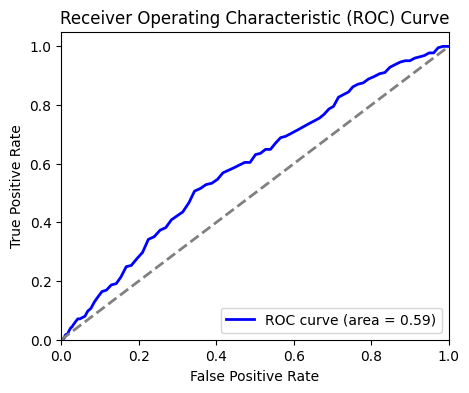

In [ ]:
y_pred_proba = pipeline3.predict_proba(X = df.drop(columns=['Class', 'x', 'y', 'z']))[:, 1]
fpr, tpr, thresholds = roc_curve(y, y_pred_proba)
roc_auc = auc(fpr, tpr)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

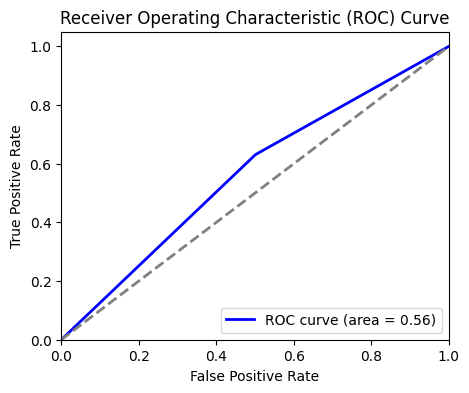

In [ ]:
SSfrom sklearn.metrics import auc, roc_curve


# Plotting the ROC-AUC curve
fpr, tpr, _ = roc_curve(y, y_test_pred_adjusted)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# SVC

## 1 PCA

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.feature_selection import SelectKBest, chi2
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.svm import SVC

# Load data
df = custom_features_all

# Separate features and target
X = df.drop(columns=['Class', 'x', 'y', 'z'])
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


# Define custom class weights (example: higher weight for the minority class)
class_weights = {0: 1, 1: 100}  # Adjust these values as needed

# Define the model with custom class weights
model = SVC(kernel="poly", class_weight=class_weights, probability=True)

pca = PCA(n_components=58)


# Create a pipeline with RandomUnderSampler, RFE, standard scaler, and random forest classifier
pipeline4 = Pipeline([
    ('under', RandomUnderSampler(sampling_strategy='majority')),
    ('scaler', StandardScaler()),
    ('pca', pca),
    ('classifier', model)
])

# Perform stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
roc_auc_scores = []
recall_scores = []

for train_index, val_index in skf.split(X_train, y_train.ravel()):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    pipeline4.fit(X_train_fold, y_train_fold)
    y_val_pred = pipeline3.predict(X_val_fold)
    print(classification_report(y_val_fold, y_val_pred))

    roc_auc = roc_auc_score(y_val_fold, y_val_pred)
    roc_auc_scores.append(roc_auc)
    print(f"ROC-AUC: {roc_auc}")

    recall = recall_score(y_val_fold, y_val_pred, pos_label=1)
    recall_scores.append(recall)
    print(f"Recall: {recall}")

# Calculate the average ROC-AUC score
average_roc_auc = np.mean(roc_auc_scores)
print(f"Average ROC-AUC: {average_roc_auc}")

# Calculate the average recall score for the positive class
average_recall = np.mean(recall_scores)
print(f"Average Recall for positive class: {average_recall}")

# Train the final model on the full training set
pipeline4.fit(X_train, y_train)

              precision    recall  f1-score   support

         0.0       1.00      0.16      0.27     22642
         1.0       0.00      1.00      0.01        57

    accuracy                           0.16     22699
   macro avg       0.50      0.58      0.14     22699
weighted avg       1.00      0.16      0.27     22699

ROC-AUC: 0.5794541118275771
Recall: 1.0
              precision    recall  f1-score   support

         0.0       1.00      0.15      0.26     22642
         1.0       0.00      1.00      0.01        56

    accuracy                           0.15     22698
   macro avg       0.50      0.57      0.13     22698
weighted avg       1.00      0.15      0.26     22698

ROC-AUC: 0.5739113152548361
Recall: 1.0
              precision    recall  f1-score   support

         0.0       1.00      0.16      0.27     22642
         1.0       0.00      1.00      0.01        56

    accuracy                           0.16     22698
   macro avg       0.50      0.58      0.14     

Pipeline(steps=[('under', RandomUnderSampler(sampling_strategy='majority')),
                ('scaler', StandardScaler()), ('pca', PCA(n_components=58)),
                ('classifier',
                 SVC(class_weight={0: 1, 1: 100}, probability=True))])

In [ ]:
from sklearn.metrics import confusion_matrix

y_test_pred = pipeline4.predict(X_test)
y_test_proba = pipeline4.predict_proba(X_test)[:, 1]
cm = confusion_matrix(y_test, y_test_pred)

print(f"ROC-AUC: {roc_auc_score(y_test, y_test_pred)}")
print(f"test len: {len(y_test_pred)}")
print(f"positives: {len(np.array(y_test_pred).nonzero()[0])}")
print(f"gt_positives: {len(np.array(y_test).nonzero()[0])}")
print(f"sensitivity: {cm[1,1]/sum(cm[1,:])}")
print(f"specificity: {cm[0,0]/sum(cm[0,:])}")
print("Confusion matrix")
print(cm)


print("----------")


threshold = 0.4 # Example threshold, adjust based on your needs
y_test_pred_adjusted1 = (y_test_proba >= threshold).astype(int)
cm = confusion_matrix(y_test, y_test_pred_adjusted1)

print(f"ROC-AUC: {roc_auc_score(y_test, y_test_pred_adjusted1)}")
print(f"test len: {len(y_test_pred_adjusted1)}")
print(f"positives: {len(np.array(y_test_pred_adjusted1).nonzero()[0])}")
print(f"gt_positives: {len(np.array(y_test).nonzero()[0])}")
print(f"sensitivity: {cm[1,1]/sum(cm[1,:])}")
print(f"specificity: {cm[0,0]/sum(cm[0,:])}")

print("Confusion matrix")
print(cm)

ROC-AUC: 0.5730371843469395
test len: 28373
positives: 23428
gt_positives: 70
sensitivity: 0.9714285714285714
specificity: 0.17464579726530757
Confusion matrix
[[ 4943 23360]
 [    2    68]]
----------
ROC-AUC: 0.6319534526880037
test len: 28373
positives: 18877
gt_positives: 70
sensitivity: 0.9285714285714286
specificity: 0.33533547680457904
Confusion matrix
[[ 9491 18812]
 [    5    65]]


In [ ]:
# Load data
df = custom_features8

# Separate features and target
X = df.drop(columns=['Class', 'x', 'y', 'z'])
y = df['Class']

y_test_pred = pipeline4.predict(X)
y_test_proba = pipeline4.predict_proba(X)[:, 1]
cm = confusion_matrix(y, y_test_pred)

print(f"ROC-AUC: {roc_auc_score(y, y_test_pred)}")
print(f"test len: {len(y_test_pred)}")
print(f"positives: {len(np.array(y_test_pred).nonzero()[0])}")
print(f"gt_positives: {len(np.array(y).nonzero()[0])}")
print(f"sensitivity: {cm[1,1]/sum(cm[1,:])}")
print(f"specificity: {cm[0,0]/sum(cm[0,:])}")
print("Confusion matrix")
print(cm)


print("----------")


threshold = 0.49 # Example threshold, adjust based on your needs
y_test_pred_adjusted = (y_test_proba >= threshold).astype(int)
cm = confusion_matrix(y, y_test_pred_adjusted)

print(f"ROC-AUC: {roc_auc_score(y, y_test_pred_adjusted)}")
print(f"test len: {len(y_test_pred_adjusted)}")
print(f"positives: {len(np.array(y_test_pred_adjusted).nonzero()[0])}")
print(f"gt_positives: {len(np.array(y).nonzero()[0])}")
sens = cm[1,1]/sum(cm[1,:])
print(f"sensitivity: {sens}")
spec = cm[0,0]/sum(cm[0,:])
print(f"specificity: {spec}")

print("Confusion matrix")
print(cm)

print(pipeline4.get_params()["steps"][-2:])
print(f"\n{threshold},{sens},{spec}")

ROC-AUC: 0.5392681631826417
test len: 61122
positives: 50363
gt_positives: 225
sensitivity: 0.9022222222222223
specificity: 0.17631410414306123
Confusion matrix
[[10737 50160]
 [   22   203]]
----------
ROC-AUC: 0.560660787887745
test len: 61122
positives: 30915
gt_positives: 225
sensitivity: 0.6266666666666667
specificity: 0.4946549091088231
Confusion matrix
[[30123 30774]
 [   84   141]]
[('pca', PCA(n_components=58)), ('classifier', SVC(class_weight={0: 1, 1: 100}, probability=True))]

0.49,0.6266666666666667,0.4946549091088231


### Gridsearch

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, recall_score
from sklearn.feature_selection import SelectKBest, chi2
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.svm import SVC

# Load data
df = custom_features_all

# Separate features and target
X = df.drop(columns=['Class', 'x', 'y', 'z'])
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Define custom class weights (example: higher weight for the minority class)
class_weights = {0: 1, 1: 100}  # Adjust these values as needed

# Define the model with custom class weights
model = SVC(class_weight=class_weights, probability=True)

pca = PCA()

# Create a pipeline with RandomUnderSampler, StandardScaler, PCA, and SVC
pipeline = Pipeline([
    ('under', RandomUnderSampler(sampling_strategy='majority', random_state=42)),
    ('scaler', StandardScaler()),
    ('pca', pca),
    ('classifier', model)
])

# Define parameter grid for GridSearchCV
param_grid = {
    'pca__n_components': [50, 54, 56, 58, 60],
    'classifier__kernel': ['poly', 'rbf',],
    'classifier__C': [0.1, 1, 10],
    #'classifier__degree': [2, 3, 4]  # Only relevant for 'poly' kernel
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='roc_auc', cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42))

# Fit the model with grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best ROC-AUC score: {best_score}")

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)
roc_auc = roc_auc_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred, pos_label=1)

print(classification_report(y_test, y_test_pred))
print(f"Test ROC-AUC: {roc_auc}")
print(f"Test Recall: {recall}")


Best parameters: {'classifier__C': 10, 'classifier__kernel': 'rbf', 'pca__n_components': 60}
Best ROC-AUC score: 0.6607678490900868
              precision    recall  f1-score   support

         0.0       1.00      0.54      0.70     28303
         1.0       0.00      0.73      0.01        70

    accuracy                           0.54     28373
   macro avg       0.50      0.63      0.35     28373
weighted avg       1.00      0.54      0.70     28373

Test ROC-AUC: 0.6348047405373484
Test Recall: 0.7285714285714285


In [ ]:
# Load data
df = custom_features8

best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
# Separate features and target
X = df.drop(columns=['Class', 'x', 'y', 'z'])
y = df['Class']

y_test_pred = best_model.predict(X)
y_test_proba = best_model.predict_proba(X)[:, 1]
cm = confusion_matrix(y, y_test_pred)

print(f"ROC-AUC: {roc_auc_score(y, y_test_pred)}")
print(f"test len: {len(y_test_pred)}")
print(f"positives: {len(np.array(y_test_pred).nonzero()[0])}")
print(f"gt_positives: {len(np.array(y).nonzero()[0])}")
print(f"sensitivity: {cm[1,1]/sum(cm[1,:])}")
print(f"specificity: {cm[0,0]/sum(cm[0,:])}")
print("Confusion matrix")
print(cm)


print("----------")


threshold = 0.45 # Example threshold, adjust based on your needs
y_test_pred_adjusted = (y_test_proba >= threshold).astype(int)
cm = confusion_matrix(y, y_test_pred_adjusted)

print(f"ROC-AUC: {roc_auc_score(y, y_test_pred_adjusted)}")
print(f"test len: {len(y_test_pred_adjusted)}")
print(f"positives: {len(np.array(y_test_pred_adjusted).nonzero()[0])}")
print(f"gt_positives: {len(np.array(y).nonzero()[0])}")
sens = cm[1,1]/sum(cm[1,:])
print(f"sensitivity: {sens}")
spec = cm[0,0]/sum(cm[0,:])
print(f"specificity: {spec}")

print("Confusion matrix")
print(cm)

print(best_model.get_params()["steps"][-2:])
print(f"\n{threshold},{sens},{spec}")

ROC-AUC: 0.5182946067403429
test len: 61122
positives: 28197
gt_positives: 225
sensitivity: 0.49777777777777776
specificity: 0.5388114357029082
Confusion matrix
[[32812 28085]
 [  113   112]]
----------
ROC-AUC: 0.5228205001888434
test len: 61122
positives: 29819
gt_positives: 225
sensitivity: 0.5333333333333333
specificity: 0.5123076670443536
Confusion matrix
[[31198 29699]
 [  105   120]]
[('pca', PCA(n_components=60)), ('classifier', SVC(C=10, class_weight={0: 1, 1: 100}, probability=True))]

0.45,0.5333333333333333,0.5123076670443536


## 2 RFE

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.feature_selection import RFE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Load data
df = custom_features_all

# Separate features and target
X = df.drop(columns=['Class', 'x', 'y', 'z'])
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Define custom class weights (example: higher weight for the minority class)
class_weights = {0: 1, 1: 100}  # Adjust these values as needed

# Define the model with custom class weights
model = SVC(kernel="rbf", class_weight=class_weights, probability=True)

# Perform RFE
rfe = RFE(estimator=LogisticRegression(max_iter=200, solver='saga'), n_features_to_select=30, step=1)

# Create a pipeline with RandomUnderSampler, RFE, standard scaler, and random forest classifier
pipeline5 = Pipeline([
    ('under', RandomUnderSampler(random_state=42)),
    ('scaler', StandardScaler()),
    ('rfe', rfe),
    ('classifier', model)
])

# Perform stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
roc_auc_scores = []
recall_scores = []

for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    pipeline5.fit(X_train_fold, y_train_fold)
    y_val_pred = pipeline.predict(X_val_fold)
    print(classification_report(y_val_fold, y_val_pred))

    roc_auc = roc_auc_score(y_val_fold, y_val_pred)
    roc_auc_scores.append(roc_auc)
    print(f"ROC-AUC: {roc_auc}")

    recall = recall_score(y_val_fold, y_val_pred, pos_label=1)
    recall_scores.append(recall)
    print(f"Recall: {recall}")

# Calculate the average ROC-AUC score
average_roc_auc = np.mean(roc_auc_scores)
print(f"Average ROC-AUC: {average_roc_auc}")

# Calculate the average recall score for the positive class
average_recall = np.mean(recall_scores)
print(f"Average Recall for positive class: {average_recall}")

# Train the final model on the full training set
pipeline.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

              precision    recall  f1-score   support

         0.0       1.00      0.68      0.81     22642
         1.0       0.01      1.00      0.02        57

    accuracy                           0.68     22699
   macro avg       0.50      0.84      0.41     22699
weighted avg       1.00      0.68      0.80     22699

ROC-AUC: 0.8375806024202809
Recall: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

              precision    recall  f1-score   support

         0.0       1.00      0.68      0.81     22642
         1.0       0.01      1.00      0.02        56

    accuracy                           0.68     22698
   macro avg       0.50      0.84      0.41     22698
weighted avg       1.00      0.68      0.81     22698

ROC-AUC: 0.8386184965992404
Recall: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

              precision    recall  f1-score   support

         0.0       1.00      0.68      0.81     22642
         1.0       0.01      1.00      0.02        56

    accuracy                           0.69     22698
   macro avg       0.50      0.84      0.41     22698
weighted avg       1.00      0.69      0.81     22698

ROC-AUC: 0.8422842505079057
Recall: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

              precision    recall  f1-score   support

         0.0       1.00      0.67      0.81     22642
         1.0       0.01      1.00      0.01        56

    accuracy                           0.68     22698
   macro avg       0.50      0.84      0.41     22698
weighted avg       1.00      0.68      0.80     22698

ROC-AUC: 0.8374039395813091
Recall: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

              precision    recall  f1-score   support

         0.0       1.00      0.68      0.81     22642
         1.0       0.01      1.00      0.02        56

    accuracy                           0.68     22698
   macro avg       0.50      0.84      0.41     22698
weighted avg       1.00      0.68      0.81     22698

ROC-AUC: 0.8388834908576981
Recall: 1.0
Average ROC-AUC: 0.8389541559932869
Average Recall for positive class: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Pipeline(steps=[('under', RandomUnderSampler(random_state=42)),
                ('scaler', StandardScaler()),
                ('rfe',
                 RFE(estimator=LogisticRegression(max_iter=200, solver='saga'),
                     n_features_to_select=30)),
                ('classifier',
                 RandomForestClassifier(class_weight={0: 1, 1: 100},
                                        random_state=42))])

In [ ]:
# Load data
df = custom_features8

# Separate features and target
X = df.drop(columns=['Class', 'x', 'y', 'z'])
y = df['Class']

y_test_pred = pipeline5.predict(X)
y_test_proba = pipeline5.predict_proba(X)[:, 1]
cm = confusion_matrix(y, y_test_pred)

print(f"ROC-AUC: {roc_auc_score(y, y_test_pred)}")
print(f"test len: {len(y_test_pred)}")
print(f"positives: {len(np.array(y_test_pred).nonzero()[0])}")
print(f"gt_positives: {len(np.array(y).nonzero()[0])}")
print(f"sensitivity: {cm[1,1]/sum(cm[1,:])}")
print(f"specificity: {cm[0,0]/sum(cm[0,:])}")
print("Confusion matrix")
print(cm)


print("----------")


threshold = 0.49 # Example threshold, adjust based on your needs
y_test_pred_adjusted = (y_test_proba >= threshold).astype(int)
cm = confusion_matrix(y, y_test_pred_adjusted)

print(f"ROC-AUC: {roc_auc_score(y, y_test_pred_adjusted)}")
print(f"test len: {len(y_test_pred_adjusted)}")
print(f"positives: {len(np.array(y_test_pred_adjusted).nonzero()[0])}")
print(f"gt_positives: {len(np.array(y).nonzero()[0])}")
sens = cm[1,1]/sum(cm[1,:])
print(f"sensitivity: {sens}")
spec = cm[0,0]/sum(cm[0,:])
print(f"specificity: {spec}")

print("Confusion matrix")
print(cm)

print(pipeline5.get_params()["steps"][-2:])
print(f"\n{threshold},{sens},{spec}")

ROC-AUC: 0.5067133027899567
test len: 61122
positives: 47265
gt_positives: 225
sensitivity: 0.7866666666666666
specificity: 0.22675993891324694
Confusion matrix
[[13809 47088]
 [   48   177]]
----------
ROC-AUC: 0.5429686191438002
test len: 61122
positives: 28995
gt_positives: 225
sensitivity: 0.56
specificity: 0.5259372382876004
Confusion matrix
[[32028 28869]
 [   99   126]]
[('rfe', RFE(estimator=LogisticRegression(max_iter=200, solver='saga'),
    n_features_to_select=30)), ('classifier', SVC(class_weight={0: 1, 1: 100}, probability=True))]

0.49,0.56,0.5259372382876004
